accuracy within 10% = 0.1213
accuracy within 15% = 0.1898
accuracy within 20% = 0.2689


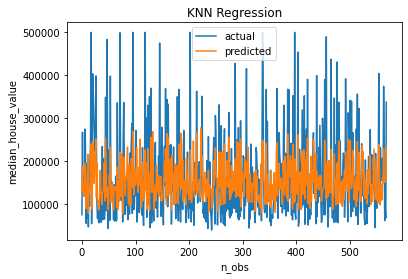

In [13]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from statistics import mean

housing=pandas.read_csv('C:/Users/000110888/OneDrive - CSULB/Desktop/housing_data.csv')
coding={'<1H OCEAN': 1, 'INLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}
housing['ocean_proximity']=housing['ocean_proximity'].map(coding)
X=housing.iloc[:,0:7].values
y=housing.iloc[:,7].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=833567)

#FITTING kNN REGRESSION
reg=KNeighborsRegressor(n_neighbors=63)
kNN_reg=reg.fit(X_train, y_train)

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
y_pred=kNN_reg.predict(X_test)
ind10=[]
ind15=[]
ind20=[]     

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)
 
#accuracy within 10%
accuracy10=mean(ind10)
print('accuracy within 10% =', round(accuracy10,4))

#accuracy within 15%
accuracy15=mean(ind15)
print('accuracy within 15% =', round(accuracy15,4))

#accuracy within 20%
accuracy20=mean(ind20)
print('accuracy within 20% =', round(accuracy20,4))


#plotting actual and predicted obsevations vs. observation number
import matplotlib.pyplot as plt
  
n_obs=list(range(0,len(y_test)))
plt.plot(n_obs, y_test, label="actual")
plt.plot(n_obs, y_pred, label="predicted")
plt.xlabel('n_obs')
plt.ylabel('median_house_value')
plt.title('KNN Regression')
plt.legend()
plt.show()